In [1]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enmspring.graphs_bigtraj import BackboneMeanModeAgent
from enmspring.backbone_k import BackboneRiboseK, BarPlot

big_traj_folder = '/home/ytcdata/bigtraj_fluctmatch/500ns'
df_folder = '/home/yizaochen/Documents/dna_2021_drawzone/backbone_k'
draw_folder = '/home/yizaochen/Desktop/drawzone_temp'
hosts = ['a_tract_21mer', 'g_tract_21mer', 'gcgc_21mer', 'atat_21mer']

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
br_agent = BackboneRiboseK(host, big_traj_folder, df_folder)

### Part 2: Make/Read arranged dataframe

In [3]:
make_dataframe = False
if make_dataframe:
    br_agent.initialize_mean_mode_agent()
    br_agent.make_df()

In [3]:
br_agent.read_df()

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/a_tract_21mer.csv


In [52]:
br_agent.df.head()

,PairType,Big_Category,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,k-mean,k-std,b0,b0-std
0,same-P-P-0,backbone,STRAND1,1,O5',STRAND1,1,C5',0.356563,0.112825,1.952247,0.001147
1,same-P-S-0,backbone,STRAND1,1,O5',STRAND1,1,C4',0.269289,0.170900,2.304158,1.190102
2,same-P-S-0,backbone,STRAND1,1,O5',STRAND1,1,O4',0.196763,0.041213,3.323789,0.138322
3,same-P-P-0,backbone,STRAND1,1,C5',STRAND1,1,O5',0.356563,0.112825,1.952247,0.001147
4,same-P-S-0,backbone,STRAND1,1,C5',STRAND1,1,C4',14.476316,7.172439,1.540274,0.000513


### Part 3: Bar Plot

In [92]:
category = 'R0' # PP0, PP1, PP2, R0, R1
df_sele = br_agent.get_df_category(category)
df_sele.head()

,PairType,Big_Category,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,k-mean,k-std,b0,b0-std
10,same-S-S-0,sugar,STRAND1,1,C4',STRAND1,1,O4',27.421074,11.330428,1.426326,0.000536
12,same-S-S-0,sugar,STRAND1,1,C4',STRAND1,1,C3',17.865479,6.686403,1.537200,0.000453
17,same-S-S-0,sugar,STRAND1,1,O4',STRAND1,1,C4',27.421074,11.330428,1.426326,0.000536
18,same-S-S-0,sugar,STRAND1,1,O4',STRAND1,1,C1',21.239695,8.998944,1.420716,0.000571
27,same-S-S-0,sugar,STRAND1,1,C1',STRAND1,1,O4',21.239695,8.998944,1.420716,0.000571


In [54]:
bar_agent = BarPlot(host, category, df_sele, width=0.8)

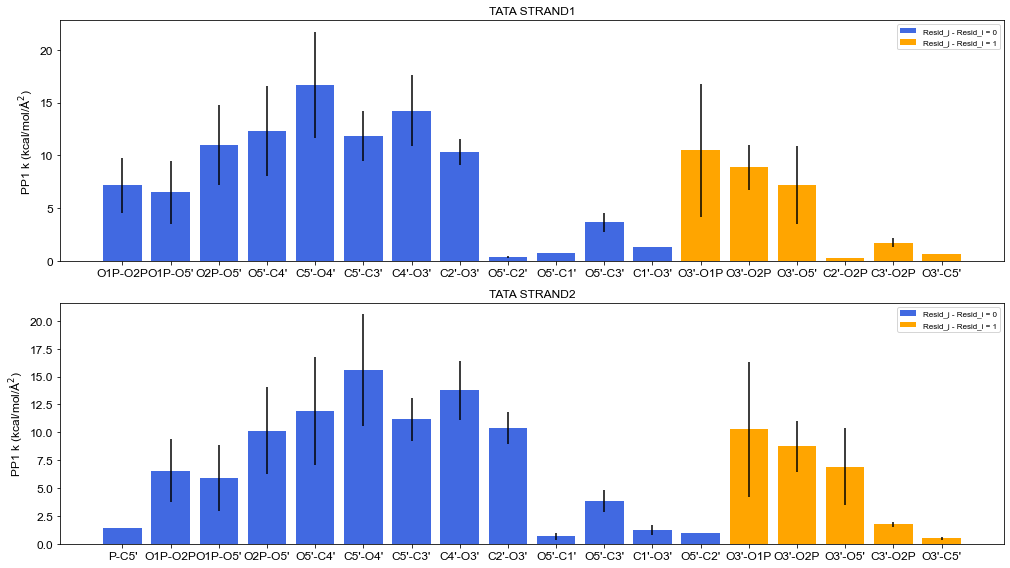

In [29]:
figsize = (14, 8) # (10, 8)
ylims = None

bar_agent.bar_two_strands(figsize, ylims)
plt.tight_layout()
#plt.savefig(path.join(draw_folder, f'{host}.png'), dpi=150, transparent=False)
plt.show()

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/a_tract_21mer.csv


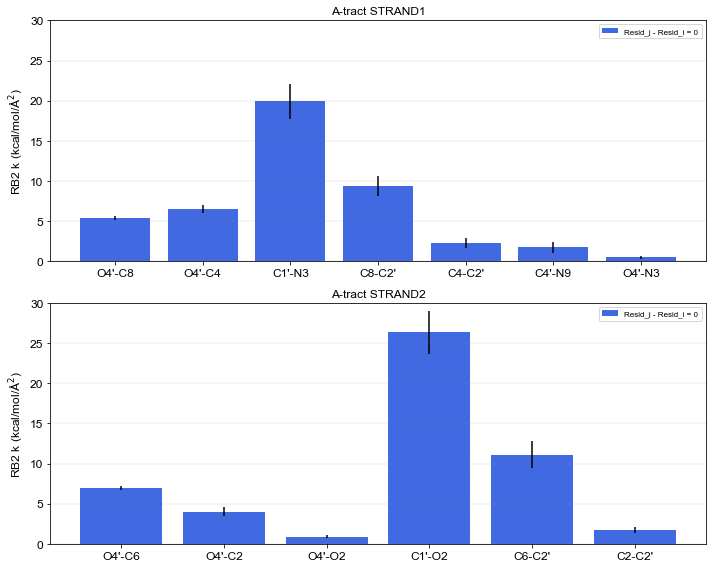

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/g_tract_21mer.csv


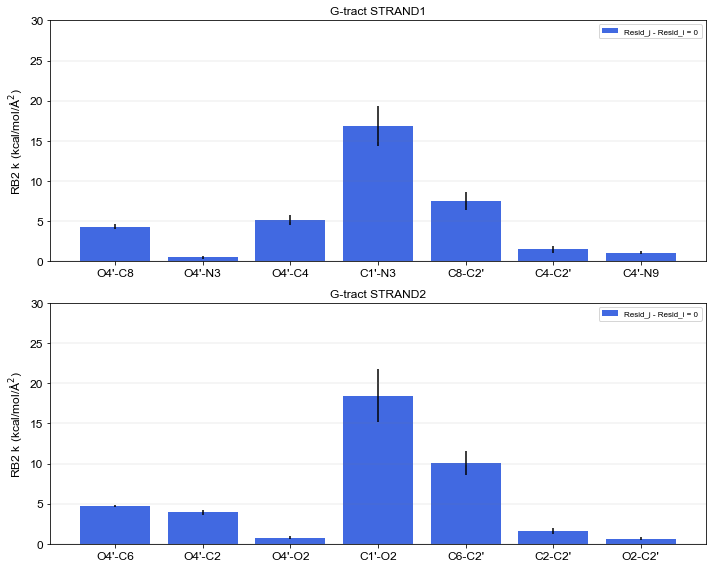

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/gcgc_21mer.csv


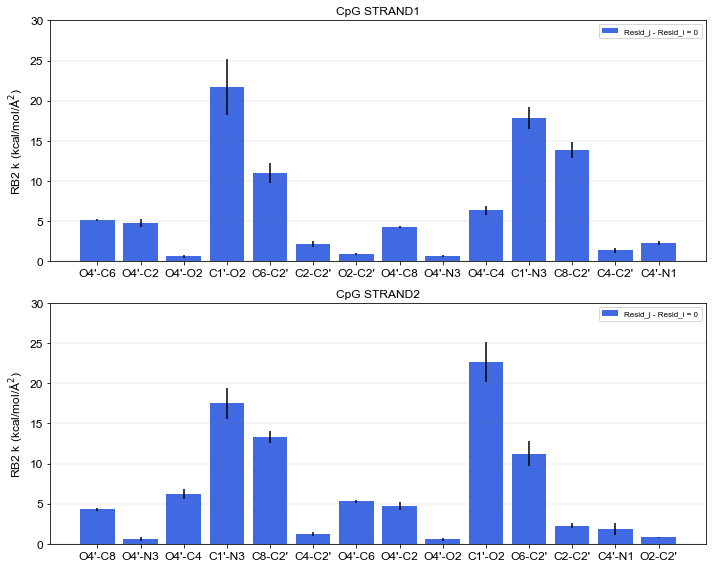

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/atat_21mer.csv


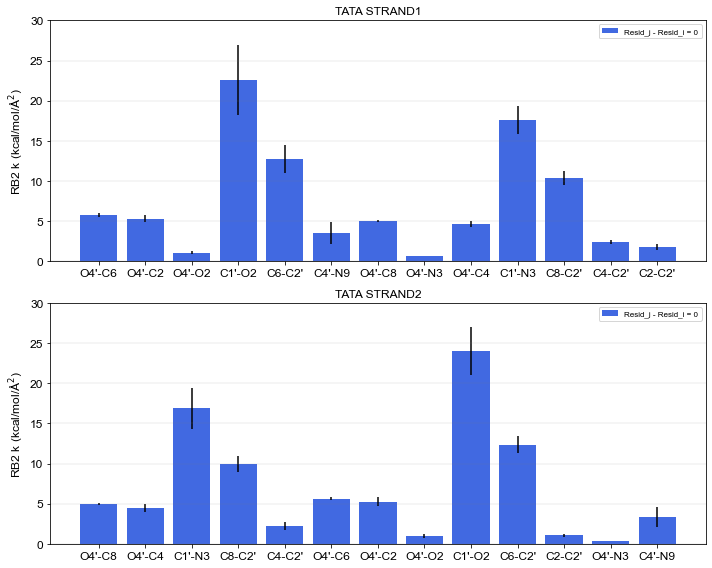

In [12]:
category = 'RB2' # PP0, PP1, PP2, R0, R1, RB0, RB1, RB2
for host in hosts:
    br_agent = BackboneRiboseK(host, big_traj_folder, df_folder)
    br_agent.read_df()    
    df_sele = br_agent.get_df_category(category)
    
    bar_agent = BarPlot(host, category, df_sele, width=0.8)

    figsize = (10, 8) # (10, 8)
    ylims = (0, 30)
    assit_hlines = np.arange(0, 30.1, 5)

    bar_agent.bar_two_strands(figsize, ylims, assit_hlines)
    plt.tight_layout()
    plt.savefig(path.join(draw_folder, f'{host}.png'), dpi=150, transparent=False)
    plt.show()

### Part 4: Bar Plot By Selection

In [105]:
big_d_pair_type = {'PP0': {0: ['P-O1P', 'P-O2P', "P-O5'", "O5'-C5'", "C5'-C4'", "C3'-O3'"], 1: ["O3'-P"]},
                   'PP1': {0: ['O1P-O2P', "O1P-O5'", "O2P-O5'", "O5'-C4'", "C5'-O4'", "C5'-C3'", "C4'-O3'", "C2'-O3'"],
                           1: ["O3'-O1P", "O3'-O2P", "O3'-O5'"]},
                   'PP2': {0: ["P-C5'", "O1P-C5'", "O5'-O4'", "O4'-O3'"],
                           1: ["C3'-P", "C3'-O2P", "C2'-P", "O3'-C5'"]},
                   'R0': {0: ["C4'-O4'", "C4'-C3'", "O4'-C1'", "C1'-C2'", "C3'-C2'"]},
                   'R1': {0: ["C4'-C1'", "C4'-C2'", "O4'-C3'", "O4'-C2'", "C1'-C3'"]}
                  }
d_ylims = {'PP0': (0, 80), 'PP1': (0, 31), 'PP2': (0, 37), 'R0': (0, 140), 'R1': (0, 45), 'RB0': (0, 180), 'RB1': (0, 65), 'RB2': (0, 30)}

d_assit_hlines = {'PP0': range(10, 81, 10), 'PP1': np.arange(0, 30.1, 2.5), 'PP2': np.arange(0, 35.1, 2.5), 
                  'R0': np.arange(0, 140, 20), 'R1': np.arange(0, 45.1, 5), 'RB0': np.arange(0, 180.1, 20), 
                  'RB1': np.arange(0, 60.1, 10), 'RB2': np.arange(0, 30.1, 5)}

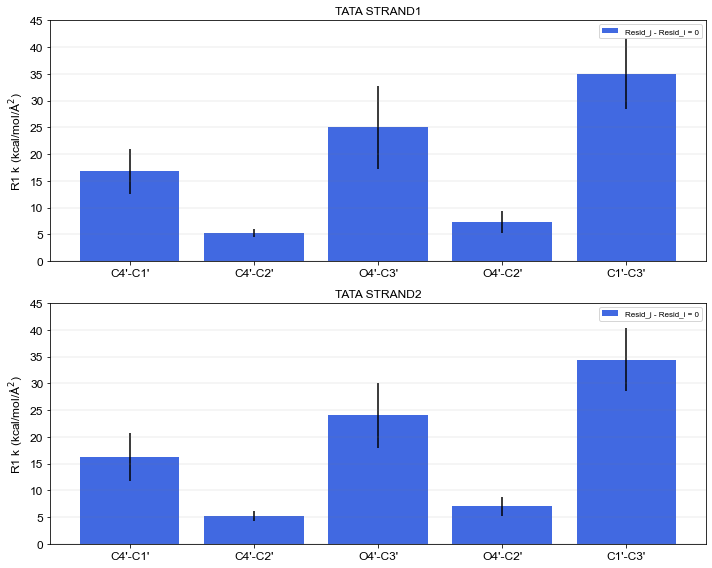

In [106]:
figsize = (10, 8)
ylims = d_ylims[category]

bar_agent.bar_two_strands_by_d_pair_type(figsize, ylims, big_d_pair_type[category], d_assit_hlines[category])
plt.tight_layout()
plt.savefig(path.join(draw_folder, f'{host}.png'), dpi=150, transparent=False)
plt.show()

### Batch Generate

In [107]:
category = 'R1' # PP0, PP1, PP2, R0, R1

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/a_tract_21mer.csv


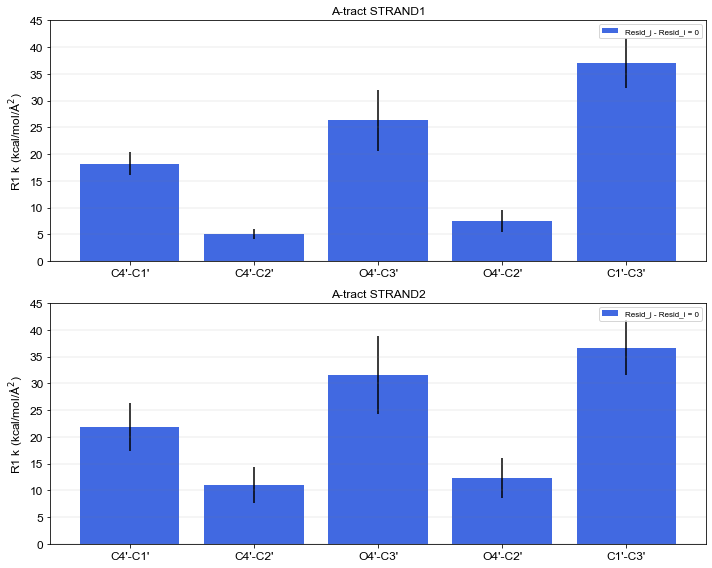

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/g_tract_21mer.csv


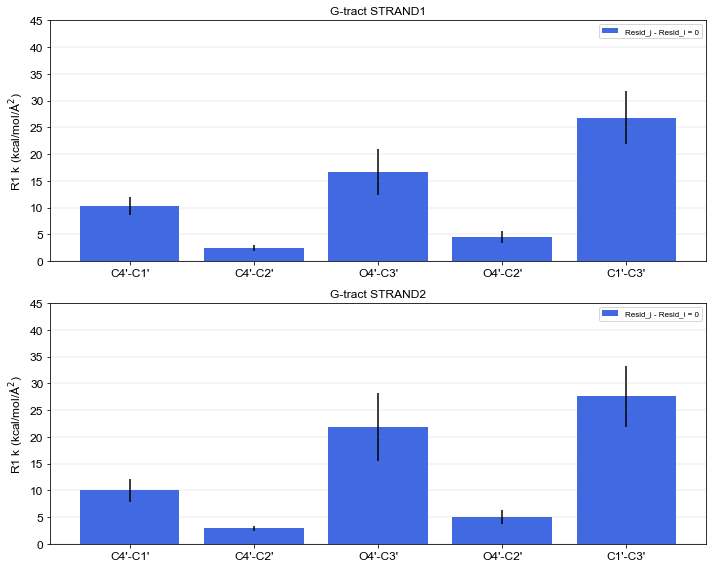

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/gcgc_21mer.csv


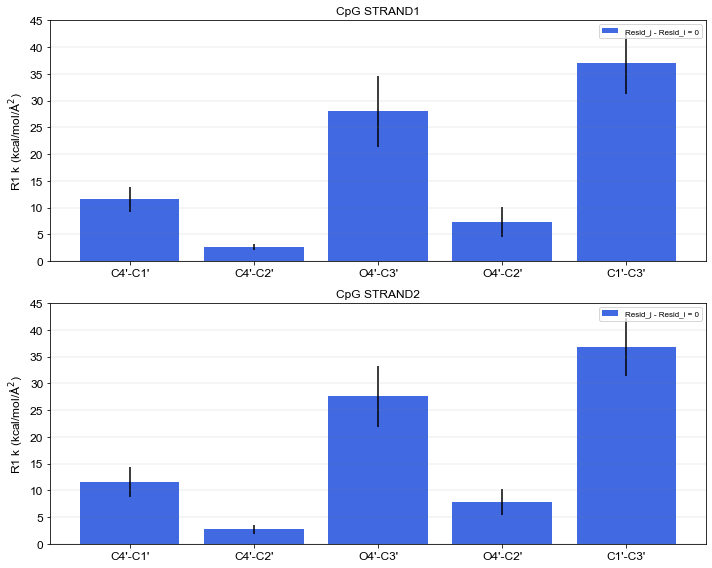

Read DataFrame from /home/yizaochen/Documents/dna_2021_drawzone/backbone_k/atat_21mer.csv


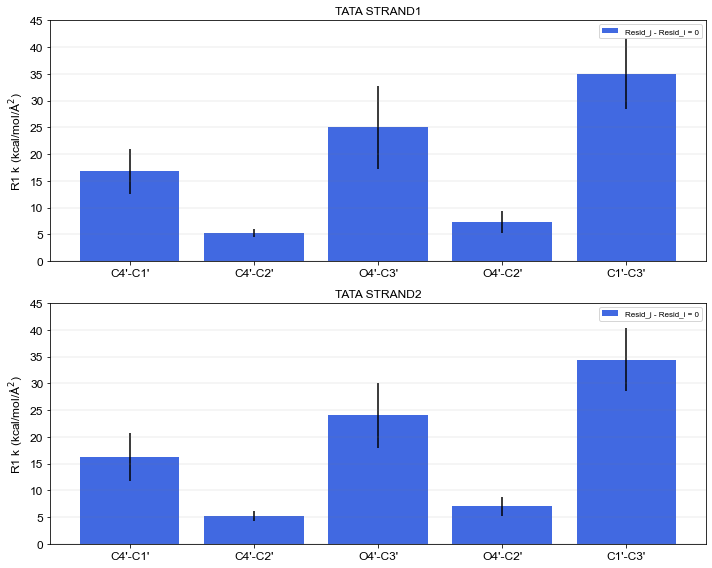

In [108]:
for host in hosts:
    br_agent = BackboneRiboseK(host, big_traj_folder, df_folder)
    br_agent.read_df()    
    df_sele = br_agent.get_df_category(category)
    
    bar_agent = BarPlot(host, category, df_sele, width=0.8)

    figsize = (10, 8)
    ylims = d_ylims[category]

    bar_agent.bar_two_strands_by_d_pair_type(figsize, ylims, big_d_pair_type[category], d_assit_hlines[category])
    plt.tight_layout()
    plt.savefig(path.join(draw_folder, f'{host}.png'), dpi=150, transparent=False)
    plt.show()

### Debug Part 1:

In [100]:
pair_container = br_agent.get_pair_container(category)

In [101]:
pair_container.get_d_pair_type_keys()

{0: ["C4'-C1'", "C4'-C2'", "O4'-C3'", "O4'-C2'", "C1'-C3'"]}

In [10]:
pair_container.d_pair_type

{0: [Diff:0 Pair:P - O1P,
  Diff:0 Pair:P - O2P,
  Diff:0 Pair:P - O5',
  Diff:0 Pair:O5' - C5',
  Diff:0 Pair:C5' - C4',
  Diff:0 Pair:C3' - O3',
  Diff:0 Pair:O5' - C3',
  Diff:0 Pair:O5' - C2',
  Diff:0 Pair:C1' - O3',
  Diff:0 Pair:O5' - C1',
  Diff:0 Pair:C5' - C2'],
 1: [Diff:1 Pair:O3' - P,
  Diff:1 Pair:O3' - C5',
  Diff:1 Pair:C3' - O5',
  Diff:1 Pair:C2' - O2P,
  Diff:1 Pair:C2' - O5']}

In [12]:
pair_container.get_d_mean_std()

{0: {'P-O1P': {'mean': 23.717557894736846, 'std': 12.009342701418069},
  'P-O2P': {'mean': 29.2834050877193, 'std': 7.3774351725752405},
  "P-O5'": {'mean': 27.271456666666673, 'std': 11.632157055670746},
  "O5'-C5'": {'mean': 28.502503157894733, 'std': 8.504948673954445},
  "C5'-C4'": {'mean': 38.092316315789475, 'std': 12.204583834367481},
  "C3'-O3'": {'mean': 51.88063719298245, 'std': 14.388525783574142},
  "O5'-C3'": {'mean': 2.1358606315789475, 'std': 1.0565250272186286},
  "O5'-C2'": {'mean': 0.24842348178137647, 'std': 0.1160397808966606},
  "C1'-O3'": {'mean': 0.5523165413533835, 'std': 0.32190076415907076},
  "O5'-C1'": {'mean': 0.3081175438596491, 'std': 0.0326964901455226},
  "C5'-C2'": {'mean': 0.4211368421052633, 'std': 0.0}},
 1: {"O3'-P": {'mean': 42.87073270676691, 'std': 17.000860046372193},
  "O3'-C5'": {'mean': 0.4815315789473685, 'std': 0.0},
  "C3'-O5'": {'mean': 0.14532236842105264, 'std': 0.023061093849061805},
  "C2'-O2P": {'mean': 0.3151421052631579, 'std': 0.

### Test: Resid Plot

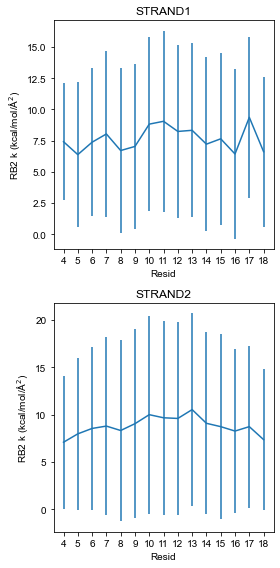

In [12]:
figsize = (4, 8)
category = 'RB2'
br_agent.plot_kmean_by_resid(figsize, category, ylim=None)
plt.tight_layout()
plt.show()